# Transferring Topo stuff to python

In [1]:
# Import packages 
import os
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.tri as tri
import matplotlib.colors as colors
import matplotlib.gridspec as gsp

from scipy.io import FortranFile

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import importlib
import glob
import copy

import Plots as Po

importlib.reload(Po)

#sys.path.append('../Plotting/')
#   Now you can imprt modules in ../Plotting
#import xyp_plot as xyp
#import ana as a


/project/amp/juliob/MiniConda/envs/adf_v0.07/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<module 'Plots' from '/project/amp/juliob/myPythonTools/TopoAna/Plots.py'>

## This Python code is suppose to read files written by the following Fortran

## Set some paths and filenames for topography files

In [2]:
TopoRoot = '/project/amp/juliob/Topo-generate-devel/Topo/Topo.git/'
Case = 'fv_0.9x1.25_Sco100_XtraOutput'
cgrid= 'fv_0.9x1.25'
Gridkey='yx'

In [3]:
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/topo*.nc')
FileN = foo[-1]
print(FileN)
topo=xr.open_dataset( FileN )
print(list(topo.variables))
print(topo.attrs)
raw=topo['terr_dev']+topo['terr_sm']
Loo = np.size(raw)
nc=int(np.sqrt( Loo/6 ))
print(int(nc))
raw=np.reshape( raw.values , (6,nc,nc) )
dev=np.reshape( topo['terr_dev'].values , (6,nc,nc) )
smoo=np.reshape( topo['terr_sm'].values , (6,nc,nc) )
tlats=np.reshape( topo['lat'].values , (6,nc,nc) )
tlons=np.reshape( topo['lon'].values , (6,nc,nc) )


/project/amp/juliob/Topo-generate-devel/Topo/Topo.git//cases/fv_0.9x1.25_Sco100_XtraOutput/output/topo_smooth_gmted2010_modis_bedmachine_nc3000_Co060.nc
['terr_sm', 'terr_dev', 'landfrac', 'lat', 'lon']
{'data_summary': 'Smoothed topo data for quicker generation of topography data', 'creation_date': '20230418', 'cesm_contact': 'Peter Hjort Lauritzen and Julio Bacmeister', 'data_source': 'https://github.com/NCAR/Topo.git', 'data_script': './cube_to_target --grid_descriptor_file /project/amp/juliob/Topo-generate-devel/Topo/inputdata/grid-descriptor-file/fv_0.9x1.25.nc --intermediate_cs_name /project/amp/juliob/Topo-generate-devel/Topo/inputdata/cubed-sphere-topo/gmted2010_modis_bedmachine-ncube3000-220518.nc --output_grid fv_0.9x1.25 --smoothing_scale 100.00000000000000 --fine_radius 0 --name_email_of_creator juliob@ucar.edu --output_data_directory output/ --development_diags', 'data_reference': 'Lauritzen, P. H. et al.: NCAR global model topography generation software for unstructured g

In [15]:
# RemapFile = 'remap_nc0540_Nsw008_Nrs000_Co012_Fi000_vX_20230106_1205.dat'
# FileN=TopoRoot +'/cases/'+ Case + '/output/'+RemapFile

# Do a file search in output directory
# Pick last (most recent) file
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/Ridge_list*dat')
FileN = foo[-1]

f=FortranFile( FileN, 'r')
idims=f.read_record( '<i4' )
print(idims)
npks=idims[0]
NSW=idims[1]
PSW=idims[2]


# Line reads fortran record written as:  
#     write(31) xs,ys  , MyPanel, NSWx_diag
#boo=f.read_record( np.dtype( ('<f8',(npks) ) ), np.dtype( ('<f8',(npks) ) ), np.dtype( ('<i4',(npks) ) ), np.dtype( ('<i4',(npks) ) ) )
xsV,ysV,MyPanelV,NSWx_diagV=\
    f.read_record( np.dtype( ('<f8',(npks) ) ), np.dtype( ('<f8',(npks) ) ), np.dtype( ('<i4',(npks) ) ), np.dtype( ('<i4',(npks) ) ) )

f.read_record('<f8') #mxvrx
f.read_record('<f8') #bsvar
mxdisV = f.read_record(   np.dtype( ('<f8',(npks) )   )  )
anglxV = f.read_record(   np.dtype( ('<f8',(npks) )   )  )
anisoV = f.read_record(   np.dtype( ('<f8',(npks) )   )  )
f.read_record('<f8') #mnslp
angllV = f.read_record(   np.dtype( ('<f8',(npks) )   )  )
xspkV,xs01 = f.read_record(   np.dtype( ('<f8',(npks) )   ) ,   np.dtype( ('<f8',(npks) )   )  )
yspkV,ys01 = f.read_record(   np.dtype( ('<f8',(npks) )   ) ,   np.dtype( ('<f8',(npks) )   )  )
f.read_record('<f8') #mxds0
f.read_record('<f8') #mxds1
f.read_record('<f8') #sft0
f.read_record('<f8') #sft1
hwdthV = f.read_record(   np.dtype( ('<f8',(npks) )   )  )
f.read_record('<f8') #npks
f.read_record('<f8') #mxvry
f.read_record('<f8') #nvls
f.read_record('<f8') #pkhts
f.read_record('<f8') #vldps
f.read_record('<f8') #rwpks
f.read_record('<f8') #rwvls
f.read_record('<f8') #lon0
f.read_record('<f8') #lon1
f.read_record('<f8') #lat0
f.read_record('<f8') #lat1

f.read_record('<f8') #uniqid
f.read_record('<f8') #riseq
f.read_record('<f8') #fallq
clngtV = f.read_record(   np.dtype( ('<f8',(npks) )   )  )
f.read_record('<f8') #mxds2

rdg_profiles = f.read_record(   np.dtype( ('<f8',(npks,PSW+1) )   )  )

crst_profiles = f.read_record(   np.dtype( ('<f8',(npks,PSW+1) )   )  )
#f.read_record('<f8') #crst_profiles

f.read_record('<f8') #crst_silhous
f.read_record('<f8') #isoht
f.read_record('<f8') #isowd
f.read_record('<f8') #isobs
f.read_record('<f8') #RefFac

rdg_profiles_x = f.read_record(   np.dtype( ('<f8',(npks,2*PSW+1) )   )  )


xnodes_list = f.read_record(   np.dtype( ('<i4',(npks,PSW+1) )   )  )
hnodes_list = f.read_record(   np.dtype( ('<f8',(npks,PSW+1) )   )  )
dcenter_list = f.read_record(   np.dtype( ('<i4',(npks) )   )  )


xwedge_list,hwedge_list = f.read_record(   np.dtype( ('<i4',(npks,3) )   ) , np.dtype( ('<f8',(npks,3) )   )  )

nnodes_list = f.read_record(   np.dtype( ('<i4',(npks) )   )  )
hwedge_x = f.read_record(   np.dtype( ('<f8',(npks,2*PSW+1) )   )  )
hnodes_x = f.read_record(   np.dtype( ('<f8',(npks,2*PSW+1) )   )  )
hwedge_o = f.read_record(   np.dtype( ('<f8',(npks,2*PSW+1) )   )  )
hnodes_o = f.read_record(   np.dtype( ('<f8',(npks,2*PSW+1) )   )  )


#plt.plot( mxdisV )



[327025     42     63]


In [5]:
print(np.shape(rdg_profiles))

(327025, 64)


206559


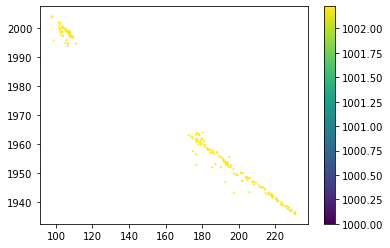

In [6]:
#Pick some points in the Southern Andes

oo=np.where( (MyPanelV==5 )&(xspkV<500)&(yspkV>1500)&(yspkV<2500)&(mxdisV>1000))
colo=mxdisV
plt.scatter( xspkV[oo[0]],yspkV[oo[0]],c=colo[oo[0]],vmax=1000, s=1.)
plt.colorbar()
print(oo[0][0])
n_go_to = oo[0][0]

53 26


(-100.0, 1400.0)

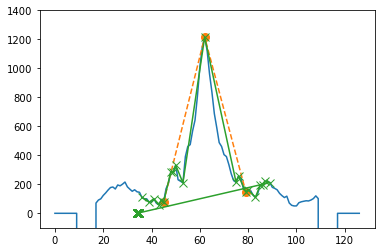

In [7]:
#n_go_to=oo[0][133]
NSWx = NSWx_diagV[n_go_to] 
Na=2*PSW+1
Nc=int(Na/2)
Nsw2=int(NSWx_diagV[n_go_to]/2)   #int(NSW/2)
print(NSWx,Nsw2)

if ((NSWx % 2)==0):
    xsh=1
else:
    xsh=2

plt.plot( rdg_profiles_x[n_go_to, : ] )
#plt.plot( hnodes_x[n_go_to, : ] ,'o-')
#plt.plot( hnodes_o[n_go_to, : ] ,'x-')
#plt.plot( hwedge_o[n_go_to, : ] ,'+-')
plt.plot( xwedge_list[n_go_to, : ] + (Nc-Nsw2)-xsh, hwedge_list[n_go_to, : ] ,'o--',markersize=8)
plt.plot( xnodes_list[n_go_to, : ] + (Nc-Nsw2)-xsh, hnodes_list[n_go_to, : ] ,'x-',markersize=8)
plt.ylim(-100,1400)
#plt.xlim(40,80)

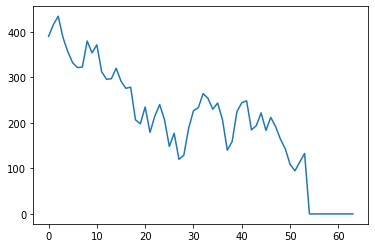

In [17]:
plt.plot( crst_profiles[n_go_to, : ] )

In [8]:
# RemapFile = 'remap_nc0540_Nsw008_Nrs000_Co012_Fi000_vX_20230106_1205.dat'
# FileN=TopoRoot +'/cases/'+ Case + '/output/'+RemapFile

# Do a file search in output directory
# Pick last (most recent) file
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/TerrXY_list*dat')
FileN = foo[-1]

f=FortranFile( FileN, 'r')
idims=f.read_record( '<i4' )

print(idims)
psw=idims[1]
Na=2*psw+1
"""
    write(32) npeaks  , PSW
      do ipk=1,npeaks
        write(32) xs(ipk),ys(ipk)  , MyPanel(ipk),xspk(ipk),yspk(ipk)
        write(32) mxdis(ipk),hwdth(ipk),clngth(ipk)
        write(32) rt_diag(:,:,ipk)
        write(32) suba_diag(:,:,ipk)
      end do
"""

for ipk in np.arange(n_go_to):
    f.read_record('<i4')
    f.read_record('<i4')
    f.read_record('<i4')
    f.read_record('<i4')
    if ( (ipk%10_000)==0 ):
        print(ipk)

        #rt_diag=np.zeros( 2*psw+1,2*psw+1 )
        
xsN,ysN,MyPanelN,xspkN,yspkN=f.read_record('<f8','<f8','<i4','<f8','<f8')
mxdisN,hwdthN,clngtN=f.read_record('<f8','<f8','<f8')
rt_diag=f.read_record('<f8').reshape(Na,Na)
suba_diag=f.read_record('<f8').reshape(Na,Na)
#plt.contour( suba_diag )

[327025     63]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [14]:
print(mxdisV[n_go_to],mxdisN)
print(anglxV[n_go_to],angllV[n_go_to])
print(clngtV[n_go_to],hwdthV[n_go_to])


1137.05422298386 [1137.05422298]
112.5 -999.0
21.266275832162385 34.0


(127, 127) 63
42 53


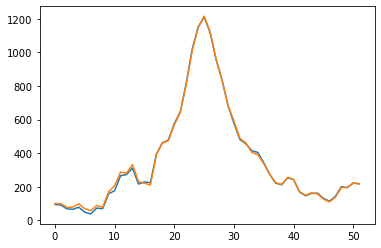

In [10]:
print(np.shape(suba_diag), int(Na/2))
Nc=int(Na/2)
print(NSW,NSWx_diagV[n_go_to])
Nsw2=int(NSWx_diagV[n_go_to]/2)   #int(NSW/2)

rtx=rt_diag[ Nc-Nsw2:Nc+Nsw2 ,Nc-Nsw2:Nc+Nsw2 ] 
subx=suba_diag[ Nc-Nsw2:Nc+Nsw2 ,Nc-Nsw2:Nc+Nsw2 ] 
plt.plot( np.average(rtx, axis=0))
plt.plot( rdg_profiles_x[n_go_to, Nc-Nsw2:Nc+Nsw2   ] )

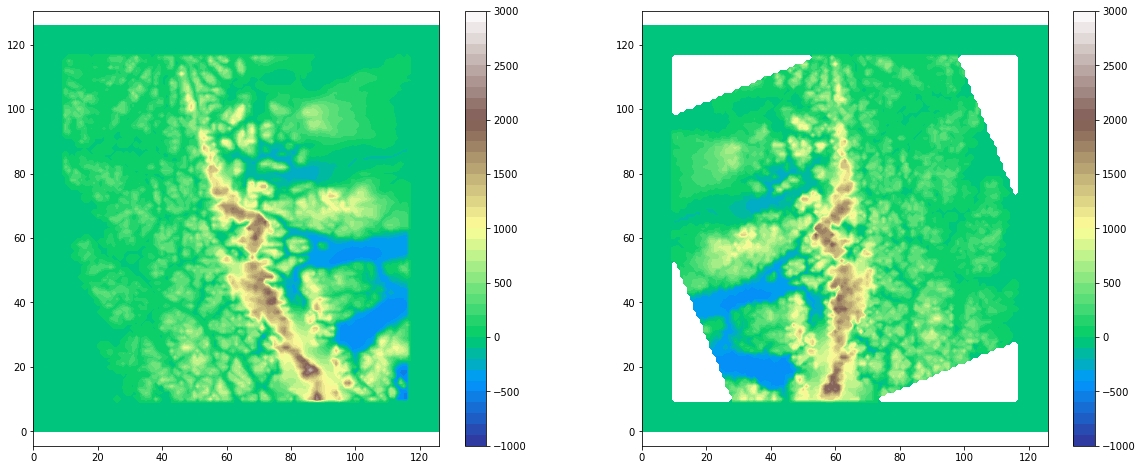

In [19]:
clev=np.linspace(-1000,3000,num=41)
#fig=plt.figure()
fig,ax = plt.subplots(1,2,figsize=(20,8) )
i=0
ax[i].axis('equal')
u = ax[i].contourf( suba_diag.T,levels=clev,cmap='terrain' )
#u = ax[i].contourf( subx,levels=clev,cmap='terrain' )
plt.colorbar(u,ax=ax[i])
i=1
ax[i].axis('equal')
u = ax[i].contourf( rt_diag,levels=clev,cmap='terrain' )
#u = ax[i].contourf( rtx,levels=clev,cmap='terrain' )
plt.colorbar(u,ax=ax[i])


(1800.0, 2300.0)

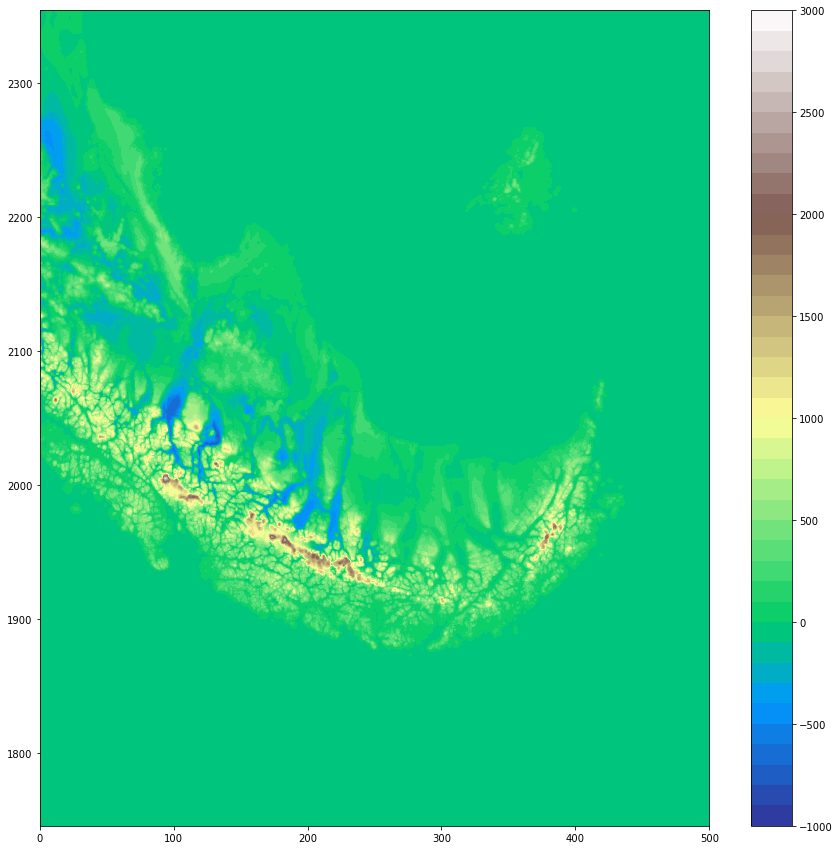

In [20]:
clev=np.linspace(-1000,3000,num=41)
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot()
ax.axis('equal')
u = ax.contourf( dev[4,:,:],levels=clev,cmap='terrain' )
plt.colorbar(u,ax=ax)
ax.set_xlim(0,500)
ax.set_ylim(1800,2300)


In [ ]:
# RemapFile = 'remap_nc0540_Nsw008_Nrs000_Co012_Fi000_vX_20230106_1205.dat'
# FileN=TopoRoot +'/cases/'+ Case + '/output/'+RemapFile

# Do a file search in output directory
# Pick last (most recent) file
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/remap*dat')
FileN = foo[-1]

f=FortranFile( FileN, 'r')
idims=f.read_record( '<i4' )

nc=idims[0]

uniqi=f.read_record( '<f8'   ).reshape( 6,nc,nc)
aniso=f.read_record( '<f8'   ).reshape( 6,nc,nc)
anglx=f.read_record( '<f8'   ).reshape( 6,nc,nc)
mxdis=f.read_record( '<f8'   ).reshape( 6,nc,nc)
hwdth=f.read_record( '<f8'   ).reshape( 6,nc,nc)
clngt=f.read_record( '<f8'   ).reshape( 6,nc,nc)
block=f.read_record( '<f8'   ).reshape( 6,nc,nc)
profi=f.read_record( '<f8'   ).reshape( 6,nc,nc)
nodes=f.read_record( '<f8'   ).reshape( 6,nc,nc)
wedge=f.read_record( '<f8'   ).reshape( 6,nc,nc)
nodos=f.read_record( '<f8'   ).reshape( 6,nc,nc)
wedgo=f.read_record( '<f8'   ).reshape( 6,nc,nc)



## Set longitude and latitude range for check

In [ ]:
#Some locations
Regions=['Colorado','Western_US','Southern_Andes','Assam']
Region=Regions[1]
print(Region)
terrlev=[-100,0,10,20,50,100,200,500,1000,1500,2000,2500,3000 ] #,3500,4000]
devlev=np.linspace(0,2000,num=21)

# Note panels are numbered 0,...,5
if (Region=='Colorado'):
    #Colorado/New Mexico
    wlon,elon= -110.,-105.
    slat,nlat=36.,40.
    ip=3

if (Region=='Western_US'):
    #Western US
    wlon,elon=-125.,-95.
    slat,nlat=15,45
    ip=3

if (Region=='Southern_Andes'):
    #Southern Andes
    wlon,elon=-77.,-57.
    slat,nlat=-58,-45
    ip=4

if (Region=='Assam'):
    wlon,elon=80.,110.
    slat,nlat=10.,40.
    ip=1
    terrlev=[-100,0,10,20,50,100,200,500,1000,1500,2000,2500,3000,3500,4000,4500,5000.,6000.,7000.,8000.]
    devlev=np.linspace(-1000,3000,num=21)

if (elon<0.):
    elon=elon+360.
if (wlon<0.):
    wlon=wlon+360.

lonrange=np.asarray([wlon,elon] ) #-2
latrange=np.asarray([slat,nlat]) #-4



In [ ]:
if (Gridkey=='c'):
    zoo=np.where( ( (lonc<=lonrange[1])&(lonc>lonrange[0]) )&( (latc<=latrange[1])&(latc>latrange[0]) ) )
    print(len(zoo[0]))
    iroo=zoo[0]
elif (Gridkey=='yx'):
    zoox=np.where( ( (lonc<=lonrange[1])&(lonc>lonrange[0]) ) )
    zooy=np.where( ( (latc<=latrange[1])&(latc>latrange[0]) ) )
    print(len(zoox[0]),len(zooy[0]))
    iroox=zoox[0]
    irooy=zooy[0]

print(np.shape(angl))

In [ ]:
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/topo*.nc')
FileN = foo[-1]
print(FileN)
topo=xr.open_dataset( FileN )
print(list(topo.variables))
print(topo.attrs)
raw=topo['terr_dev']+topo['terr_sm']
Loo = np.size(raw)
nc=int(np.sqrt( Loo/6 ))
print(int(nc))
raw=np.reshape( raw.values , (6,nc,nc) )
dev=np.reshape( topo['terr_dev'].values , (6,nc,nc) )
smoo=np.reshape( topo['terr_sm'].values , (6,nc,nc) )
tlats=np.reshape( topo['lat'].values , (6,nc,nc) )
tlons=np.reshape( topo['lon'].values , (6,nc,nc) )


In [ ]:
terrlev=[-100,0,10,20,50,100,200,500,1000,2000,3000,4000,5000]
terrlev=np.linspace(-100,4000,42)
plt.figure( figsize=(18,15))
plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-500,2000,num=26), cmap='terrain' ,alpha=.8) #,
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],wedgo[ip,:,:], levels=np.linspace(-500.,2000.,num=26), cmap='terrain' ,alpha=.8) #,
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],dev[ip,:,:], levels=np.linspace(-500,2000.,num=21), cmap='terrain' ,alpha=.2) #,
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],raw[ip,:,:], levels=terrlev, cmap='terrain',alpha=1.) #,
plt.xlim(lonrange)
plt.ylim(latrange)


#plt.plot( [40,90],[0,30])
if (Gridkey=='c'):
    for ir in iroo:
        lat0,lon0 = latc[ir],lonc[ir]
        lat1,lon1,lat2,lon2 = Po.CAMridgelet(lat=lat0 ,lon=lon0 , angll=angl[0,ir], clngt=clng[0,ir] )
        plt.plot( [lon1,lon2] , [lat1,lat2], color='black' )
if (Gridkey=='yx'):
    for iry in irooy:
        for irx in iroox:
            lat0,lon0 = latc[iry],lonc[irx]
            lat1,lon1,lat2,lon2 = Po.CAMridgelet(lat=lat0 ,lon=lon0 , angll=angl[0,iry,irx], clngt=clng[0,iry,irx] )
            if(mxd[0,iry,irx]>100.):
                plt.plot( [lon1,lon2] , [lat1,lat2], color='black' )


#ax1 = fig.add_subplot(3, 4, ipoo , projection=ccrs.PlateCarree(central_longitude=0))
#cf = ax1.contourf(xlon, xlat, gutnx[L,:,:],  levels=clevs, cmap=cmap  , transform=ccrs.PlateCarree())

In [ ]:
terrlev=[-100,0,10,20,50,100,200,500,1000,1500,2000,2500,3000,3500,4000]
devlev=np.linspace(0,2000,num=21)
cmap=plt.cm.terrain
fig,ax = plt.subplots(2,2,figsize=(15,15) ,squeeze=False ) # , sharex=True)


j,i=0,0
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-100,500.,num=21), cmap='terrain' ,alpha=.5) #,
ax[j,i].contourf( tlons[ip,:,:],tlats[ip,:,:],raw[ip,:,:], levels=terrlev, cmap='terrain',alpha=.5) #,
ax[j,i].set_xlim(lonrange)
ax[j,i].set_ylim(latrange)

j,i=0,1
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-100,500.,num=21), cmap='terrain' ,alpha=.5) #,
ax[j,i].contourf( tlons[ip,:,:],tlats[ip,:,:],smoo[ip,:,:], levels=terrlev, cmap='terrain',alpha=.5) #,
ax[j,i].set_xlim(lonrange)
ax[j,i].set_ylim(latrange)

j,i=1,0
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-100,500.,num=21), cmap='terrain' ,alpha=.5) #,
ax[j,i].contourf( tlons[ip,:,:],tlats[ip,:,:],dev[ip,:,:], levels=devlev, cmap='terrain',alpha=1) #,
ax[j,i].set_xlim(lonrange)
ax[j,i].set_ylim(latrange)

j,i=1,1
if (Gridkey=='c'):
    ax[j,i].tricontourf(lonc,latc,mxd[0,:], levels=devlev, cmap='terrain',alpha=1)
    for ir in iroo:
        lat0,lon0 = latc[ir],lonc[ir]
        lat1,lon1,lat2,lon2 = Po.CAMridgelet(lat=lat0 ,lon=lon0 , angll=angl[0,ir], clngt=clng[0,ir] )
        plt.plot( [lon1,lon2] , [lat1,lat2], color='black' )
    
    
if (Gridkey=='yx'):
    ax[j,i].contourf(lonc,latc,mxd[0,:,:]-1, levels=devlev, cmap='terrain',alpha=1)
    for iry in irooy:
        for irx in iroox:
            lat0,lon0 = latc[iry],lonc[irx]
            lat1,lon1,lat2,lon2 = Po.CAMridgelet(lat=lat0 ,lon=lon0 , angll=angl[0,iry,irx], clngt=clng[0,iry,irx] )
            if(mxd[0,iry,irx]>100.):
                plt.plot( [lon1,lon2] , [lat1,lat2], color='black' )
    
    
ax[j,i].set_xlim(lonrange)
ax[j,i].set_ylim(latrange)


#ax1 = fig.add_subplot(3, 4, ipoo , projection=ccrs.PlateCarree(central_longitude=0))
#cf = ax1.contourf(xlon, xlat, gutnx[L,:,:],  levels=clevs, cmap=cmap  , transform=ccrs.PlateCarree())

In [ ]:
cmap=plt.cm.terrain

"""
fig,ax = plt.subplots(2,3,figsize=(21,20) ,squeeze=False ) # , sharex=True)

"""
fig = plt.figure(figsize=(21,20)  ) # , sharex=True)
gs = gsp.GridSpec( 2, 3, figure=fig ,wspace=0.1, hspace=0.1 )
    
j,i=0,0
ax=fig.add_subplot(gs[j,i])
u=ax.contourf( tlons[ip,:,:],tlats[ip,:,:],raw[ip,:,:], levels=terrlev, cmap='terrain',alpha=.5) #,
ax.set_xlim(lonrange)
ax.set_ylim(latrange)
plt.colorbar(u,ax=ax,location='bottom',shrink=.9)
ax.set_title(loc='left',label='a) Raw 3km topography' , fontsize=14)


j,i=0,1
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-100,500.,num=21), cmap='terrain' ,alpha=.5) #,
ax=fig.add_subplot(gs[j,i])
u=ax.contourf( tlons[ip,:,:],tlats[ip,:,:],smoo[ip,:,:], levels=terrlev, cmap='terrain',alpha=.5) #,
ax.set_xlim(lonrange)
ax.set_ylim(latrange)
plt.colorbar(u,ax=ax,location='bottom',shrink=.9)
ax.set_title(loc='left',label='b) 3km topography smoothed with a \n radial scale $\sim$ 180km ' , fontsize=14)

j,i=1,0
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-100,500.,num=21), cmap='terrain' ,alpha=.5) #,
ax=fig.add_subplot(gs[j,i])
u=ax.contourf( tlons[ip,:,:],tlats[ip,:,:],dev[ip,:,:], levels=devlev, cmap='terrain',alpha=1) #,
ax.set_xlim(lonrange)
ax.set_ylim(latrange)
plt.colorbar(u,ax=ax,location='bottom',shrink=.9)

j,i=1,1
ax=fig.add_subplot(gs[j,i])
if (Gridkey=='c'):
    u=ax.tricontourf(lonc,latc,mxd[0,:], levels=devlev, cmap='terrain',alpha=1)
    for ir in iroo:
        lat0,lon0 = latc[ir],lonc[ir]
        lat1,lon1,lat2,lon2 = Po.CAMridgelet(lat=lat0 ,lon=lon0 , angll=angl[0,ir], clngt=clng[0,ir] )
        plt.plot( [lon1,lon2] , [lat1,lat2], color='black' )
plt.colorbar(u,ax=ax,location='bottom',shrink=.9)
    
    
if (Gridkey=='yx'):
    u=ax.contourf(lonc,latc,mxd[0,:,:]-1, levels=devlev, cmap='terrain',alpha=1)
    for iry in irooy:
        for irx in iroox:
            lat0,lon0 = latc[iry],lonc[irx]
            lat1,lon1,lat2,lon2 = Po.CAMridgelet(lat=lat0 ,lon=lon0 , angll=angl[0,iry,irx], clngt=clng[0,iry,irx] )
            if(mxd[0,iry,irx]>100.):
                ax.plot( [lon1,lon2] , [lat1,lat2], color='black' )
    
ax.set_xlim(lonrange)
ax.set_ylim(latrange)

"""
j,i=1,2
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-100,500.,num=21), cmap='terrain' ,alpha=.5) #,
ax=fig.add_subplot(gs[j,i])
u=ax.contourf( tlons[ip,:,:],tlats[ip,:,:],wedgo[ip,:,:], levels=devlev, cmap='terrain',alpha=1) #,
ax.set_xlim(lonrange)
ax.set_ylim(latrange)
plt.colorbar(u,ax=ax,location='bottom',shrink=.9)
"""

j,i=1,2
ax=fig.add_subplot(gs[j,i])
if (Gridkey=='c'):
    u=ax.tricontourf(lonc,latc,sgh[:]-1, levels=devlev, cmap='terrain',alpha=1)
if (Gridkey=='yx'):
    u=ax.contourf(lonc,latc,sgh[:,:]-1, levels=devlev, cmap='terrain',alpha=1)
ax.set_xlim(lonrange)
ax.set_ylim(latrange)
plt.colorbar(u,ax=ax,location='bottom',shrink=.9)


#ax1 = fig.add_subplot(3, 4, ipoo , projection=ccrs.PlateCarree(central_longitude=0))
#cf = ax1.contourf(xlon, xlat, gutnx[L,:,:],  levels=clevs, cmap=cmap  , transform=ccrs.PlateCarree())

In [ ]:
plt.figure( figsize=(18,15))
#plt.contourf( tlons[ip,:,:],tlats[ip,:,:],mxdis[ip,:,:], levels=np.linspace(-100,500.,num=21), cmap='terrain' ,alpha=.5) #,
plt.contourf(dev[ip,:,:], levels=np.linspace(-100,100.,num=21), cmap='terrain',alpha=.5) #,
plt.xlim(0,1000)
plt.ylim(1500,2500)
plt.colorbar()

In [ ]:
foo=glob.glob( TopoRoot +'/cases/'+ Case + '/output/'+cgrid+'*.nc')
FileN = foo[-1]
print(FileN)
dCAM=xr.open_dataset( FileN )
print( list(dCAM.variables) )
print(np.shape(dCAM['lat']))
lonc=dCAM['lon'].values
latc=dCAM['lat'].values
angl=dCAM['ANGLL'].values
hwdt=dCAM['HWDTH'].values
clng=dCAM['CLNGT'].values
mxd=dCAM['MXDIS'].values
sgh=dCAM['SGH'].values
